In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
root = "sfh_1000_10_20250925_111440"

real_spec = np.load(f"OUTPUTS/{root}/{root}_snr_spectra.npy")
real_sfh = np.load(f"OUTPUTS/{root}/snr__all_true.npy")
wav = np.load(f"OUTPUTS/{root}/{root}_wavelength.npy")

def load_noisy_data(snr):
    if snr == None:
        pred_sfh = np.load(f"OUTPUTS/{root}/snr__all_pred.npy")
    else:
        pred_sfh = np.load(f"OUTPUTS/{root}/snr_{snr}_all_pred.npy")
    return pred_sfh

# Bin setup (used in multiple places)
bin_arr = np.r_[np.array([0.001, 0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 4)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

snrNone = load_noisy_data(None)
snr100 = load_noisy_data(100)
snr50 = load_noisy_data(50)
snr10 = load_noisy_data(10)

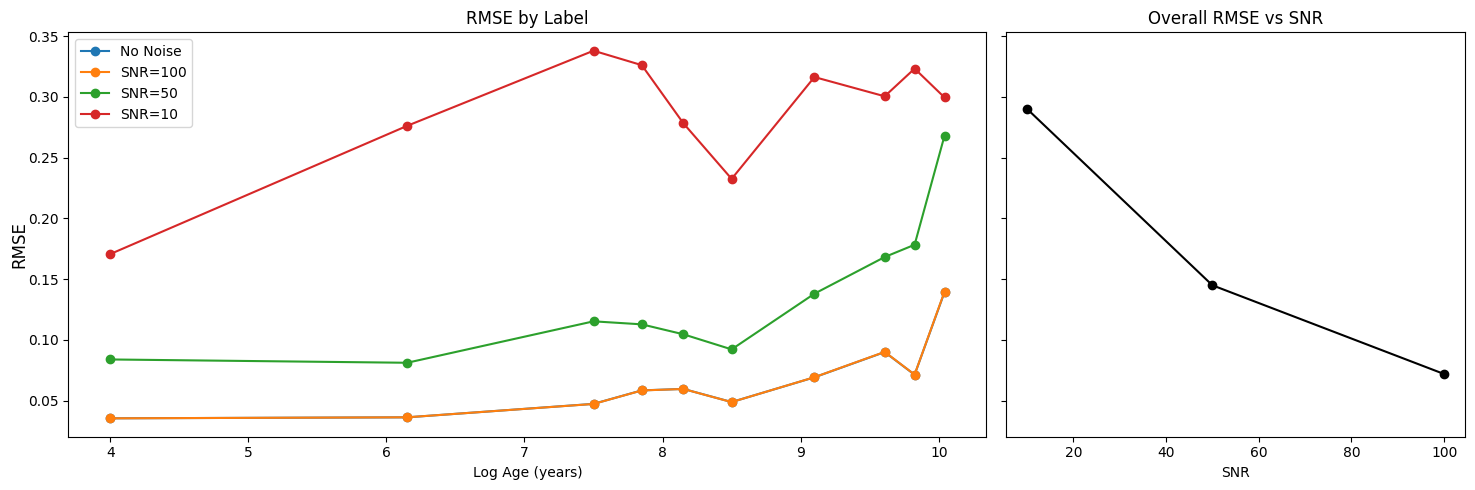

In [5]:
def rmse(pred_sfh):
    rmse = np.sqrt(mean_squared_error(real_sfh, pred_sfh, multioutput='raw_values'))
    overall_rmse = np.sqrt(mean_squared_error(real_sfh, pred_sfh))
    return rmse, overall_rmse

fig, ax = plt.subplots(1, 2, figsize=(15,5), sharey=True, gridspec_kw={'width_ratios': [2, 1]})

ax[0].plot(bin_centers, rmse(snrNone)[0], label='No Noise', marker='o')
ax[0].plot(bin_centers, rmse(snr100)[0], label='SNR=100', marker='o')
ax[0].plot(bin_centers, rmse(snr50)[0], label='SNR=50', marker='o')
ax[0].plot(bin_centers, rmse(snr10)[0], label='SNR=10', marker='o')
ax[0].set_xlabel('Log Age (years)')
ax[0].set_title('RMSE by Label')
ax[0].legend()

ax[1].plot(np.array([100, 50, 10]), [rmse(snr100)[1], rmse(snr50)[1], rmse(snr10)[1]], 'ko-')
ax[1].set_title('Overall RMSE vs SNR')
ax[1].set_xlabel('SNR')

fig.supylabel('RMSE')
plt.tight_layout()

In [6]:
def plot_sfh(snr, n):
    plt.figure(figsize=(10,5))
    plt.bar(bin_centers, real_sfh[n], width=bin_widths, alpha=0.5, label='True SFH', color='grey', edgecolor='black')
    plt.bar(bin_centers, snr[n], width=bin_widths, alpha=0.3, label='Predicted SFH', color='red', edgecolor='red')
    plt.ylabel('f')
    plt.title(f'Star Formation History Comparison (n={n})')
    plt.legend()
    plt.show()

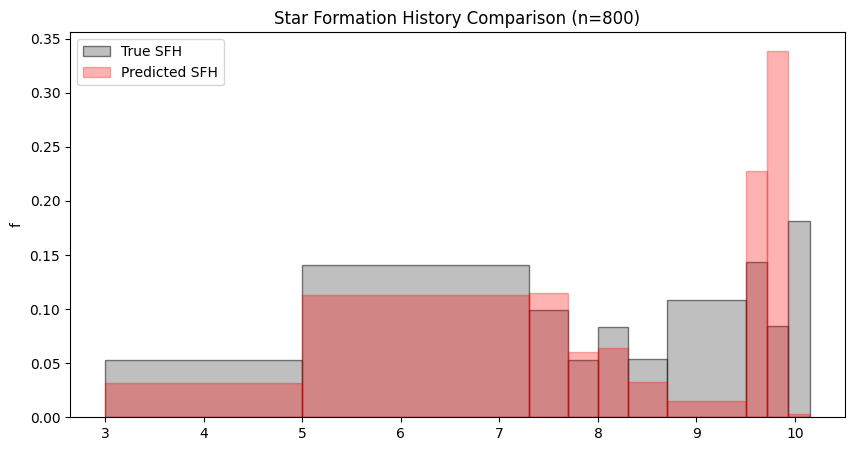

In [7]:
plot_sfh(snr50, 800)